In [2]:
import pickle
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, LancasterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer

from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

%matplotlib inline

### Data Exploration

In [3]:
data = pd.read_excel("../data/Canva_reviews.xlsx")

In [4]:
data.shape

(1500, 13)

In [5]:
data.head()

,reviewId,userName,userImage,review,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,Sentiment,Sub Category,Sub Category_test
0,gp:AOqpTOFxf3fttcT5DSvFIn9KPp5FErgH9yC533Fmoxv...,Donna Caritero,https://play-lh.googleusercontent.com/a-/AOh14...,Overall it's really an amazing app. I've been ...,4,528,2.116.0,2021-06-17 07:18:54,Hi Donna. We are sorry that your text or desig...,2021-06-19 21:24:32,Negative,NaN,bug_picture_quality
1,gp:AOqpTOEq6rNIWLnPV4KFTctWvm0mpGEQljtD6mvy1H-...,Soumi Mukhopadhyay,https://play-lh.googleusercontent.com/a-/AOh14...,Hey! Yes I gave a 5 star rating... coz I belie...,5,351,2.116.0,2021-06-17 19:18:28,NaN,NaT,Positive,extremely_happy,NaN
2,gp:AOqpTOE86hSyPRHZgYt28Uk5zGe4FZGb1hkmtFDiYJ2...,Theknown _unknown,https://play-lh.googleusercontent.com/a-/AOh14...,Canva used to be a good app! But recently I've...,1,160,2.116.0,2021-06-23 19:13:28,Hi there. We're sorry to hear that you are hav...,2021-06-26 20:20:56,Negative,saving_downloading_issue,bug_saving_files
3,gp:AOqpTOHSuKkVTcM3QgCCKysHQlxEnk2ocOKsUMiMIJy...,Anthony Dean,https://play-lh.googleusercontent.com/a/AATXAJ...,"It's a brilliant app, but I have just one prob...",5,145,2.116.0,2021-06-19 23:36:07,NaN,NaT,Negative,others,bug_app_crash
4,gp:AOqpTOEOrZt5H6jXPiplJyffCd5ZBnVXACTWgwNsF1R...,Neha Diana Wesley,https://play-lh.googleusercontent.com/a-/AOh14...,This was such a great app. I used to make BTS ...,4,142,2.116.0,2021-06-21 00:29:27,Hi Neha. Sorry to hear that you are unable to ...,2021-06-24 20:46:28,Negative,others,bug_other


In [6]:
data.loc[13, 'review']

'Unable to save my work. Nothing works :('

In [7]:
data.loc[13, 'Sentiment']

'Negative'

In [8]:
data.loc[1495, 'review']

'Absolutely amazing and a lifesaver for teachers.'

In [9]:
data.loc[1495, 'Sentiment']

'Positive'

### Bar plot of 'Sentiment'

<Axes: xlabel='Sentiment', ylabel='count'>

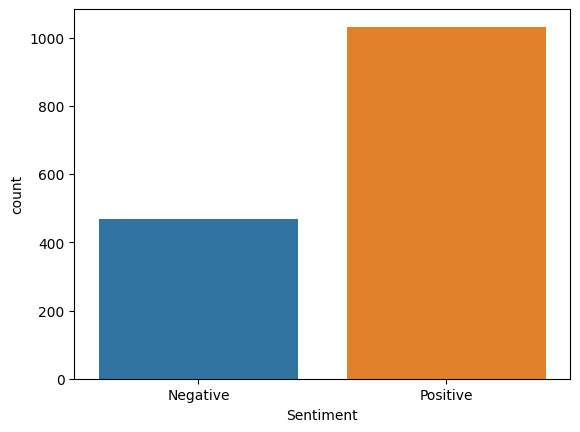

In [10]:
sns.countplot(x='Sentiment', data=data, hue='Sentiment')

In [11]:
data['Sentiment'].value_counts()

Sentiment
Positive    1032
Negative     468
Name: count, dtype: int64

### Bar plot of 'score'

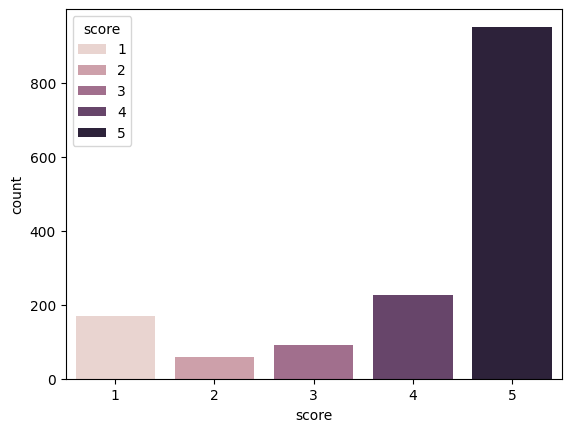

In [12]:
sns.countplot(x='score', data=data, hue='score')
plt.show()

### Check relationship between 'score' and 'Sentiment'

<Axes: xlabel='score', ylabel='count'>

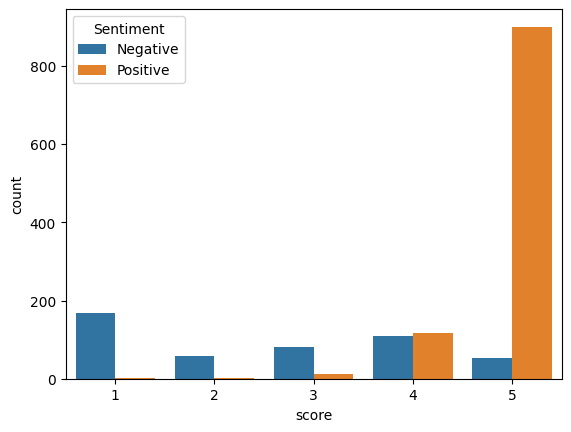

In [13]:
sns.countplot(x='score', data=data, hue='Sentiment')

### Find the length of each 'review'

In [14]:
data['lenReview'] = data['review'].apply(len)

In [15]:
data['lenReview'].describe()

count    1500.000000
mean       86.468667
std        55.681355
min        20.000000
25%        54.000000
50%        75.000000
75%       102.000000
max       498.000000
Name: lenReview, dtype: float64

### Plot the histogram on 'lenReview'

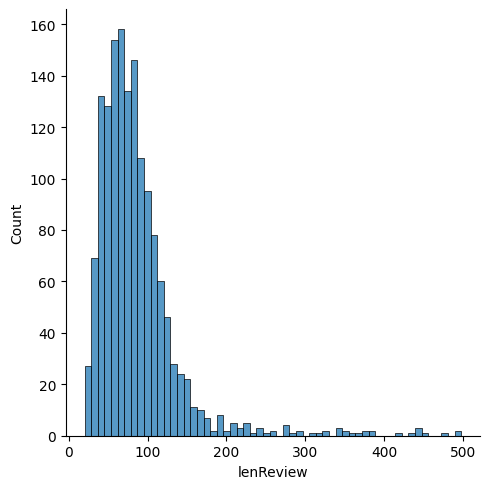

In [16]:
sns.displot(data['lenReview'])

### Plot the distribution of 'len' for different 'Sentiment' types

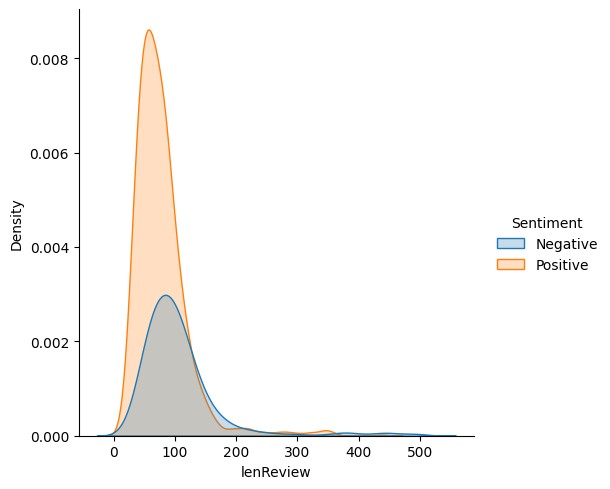

In [17]:
sns.displot(data=data, x='lenReview', hue='Sentiment', kind='kde', fill=True)

### NLTK

install punkt, stopwords, wordnet

In [18]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

## Tokenization

In [19]:
df = data[['review', 'Sentiment']]

In [20]:
df.loc[13, 'review']

'Unable to save my work. Nothing works :('

In [21]:
sent_tokenize(df.loc[13, 'review'])

['Unable to save my work.', 'Nothing works :(']

In [22]:
df.loc[1495, 'review']

'Absolutely amazing and a lifesaver for teachers.'

In [23]:
sent_tokenize(df.loc[1495, 'review'])

['Absolutely amazing and a lifesaver for teachers.']

In [24]:
word_tokenize(df.loc[13, 'review'])

['Unable', 'to', 'save', 'my', 'work', '.', 'Nothing', 'works', ':', '(']

In [25]:
word_tokenize(df.loc[1495, 'review'])

['Absolutely', 'amazing', 'and', 'a', 'lifesaver', 'for', 'teachers', '.']

#### Convert text to lower case

In [26]:
reviews = list(df.review)

In [27]:
len(reviews)

1500

In [28]:
reviews[13]

'Unable to save my work. Nothing works :('

In [29]:
reviews[1495]

'Absolutely amazing and a lifesaver for teachers.'

In [30]:
reviewsLower = [review.lower() for review in reviews]

In [31]:
reviewsLower[13]

'unable to save my work. nothing works :('

In [32]:
reviewsLower[1495]

'absolutely amazing and a lifesaver for teachers.'

In [33]:
tokens = [word_tokenize(review) for review in reviewsLower]

In [34]:
tokens[13]

['unable', 'to', 'save', 'my', 'work', '.', 'nothing', 'works', ':', '(']

In [35]:
tokens[1495]

['absolutely', 'amazing', 'and', 'a', 'lifesaver', 'for', 'teachers', '.']

### Stopwords removal


In [36]:
sw = stopwords.words('english')

In [37]:
sw[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [38]:
tokens = [[word for word in token if word not in sw] for token in tokens]

In [39]:
tokens[13]

['unable', 'save', 'work', '.', 'nothing', 'works', ':', '(']

In [40]:
reviews[13]

'Unable to save my work. Nothing works :('

In [41]:
tokens[1495]

['absolutely', 'amazing', 'lifesaver', 'teachers', '.']

In [42]:
reviews[1495]

'Absolutely amazing and a lifesaver for teachers.'

#### Remove punctuations

In [43]:
tokenizer = RegexpTokenizer(r'\w+')

In [44]:
t = tokenizer.tokenize("wasn't")

In [45]:
''.join(t)

'wasnt'

In [46]:
tokenizer.tokenize(":")

[]

In [47]:
tokens = [["".join(tokenizer.tokenize(word)) for word in token if len(tokenizer.tokenize(word))>0] for token in tokens]

In [48]:
tokens[13]

['unable', 'save', 'work', 'nothing', 'works']

In [49]:
reviews[13]

'Unable to save my work. Nothing works :('

In [50]:
tokens[1495]

['absolutely', 'amazing', 'lifesaver', 'teachers']

In [51]:
reviews[1495]

'Absolutely amazing and a lifesaver for teachers.'

In [52]:
len(tokens)

1500

### Stemming

In [53]:
porter = PorterStemmer()
lancaster = LancasterStemmer()

In [54]:
porter.stem('teachers')

'teacher'

In [55]:
lancaster.stem('teachers')

'teach'

In [56]:
porter.stem('absolutely')

'absolut'

In [57]:
lancaster.stem('absolutely')

'absolv'

In [58]:
tokens = [[porter.stem(word) for word in token] for token in tokens]

In [59]:
tokens[13]

['unabl', 'save', 'work', 'noth', 'work']

In [60]:
reviews[13]

'Unable to save my work. Nothing works :('

In [61]:
tokens[1495]

['absolut', 'amaz', 'lifesav', 'teacher']

In [62]:
reviews[1495]

'Absolutely amazing and a lifesaver for teachers.'

## Word Count Distribution

In [63]:
flat_tokens = [word for token in tokens for word in token]

In [64]:
len(flat_tokens)

13782

In [65]:
flat_tokens[:10]

['overal', 's', 'realli', 'amaz', 'app', 've', 'use', 'past', '5', 'year']

In [66]:
counts = Counter(flat_tokens)

In [67]:
len(counts)

1720

In [69]:
counts.most_common(100)

[('app', 932),
 ('use', 474),
 ('design', 349),
 ('easi', 293),
 ('s', 240),
 ('love', 220),
 ('good', 219),
 ('edit', 191),
 ('make', 190),
 ('great', 184),
 ('canva', 173),
 ('best', 165),
 ('nt', 159),
 ('work', 145),
 ('realli', 129),
 ('creat', 117),
 ('help', 113),
 ('amaz', 110),
 ('free', 110),
 ('like', 109),
 ('time', 104),
 ('download', 104),
 ('save', 103),
 ('templat', 103),
 ('nice', 102),
 ('mani', 91),
 ('thank', 84),
 ('logo', 82),
 ('lot', 80),
 ('much', 78),
 ('graphic', 73),
 ('featur', 71),
 ('video', 71),
 ('one', 70),
 ('option', 70),
 ('awesom', 68),
 ('pleas', 66),
 ('need', 65),
 ('even', 63),
 ('tri', 62),
 ('applic', 59),
 ('get', 57),
 ('problem', 55),
 ('photo', 55),
 ('take', 54),
 ('ca', 54),
 ('poster', 48),
 ('want', 47),
 ('m', 47),
 ('thumbnail', 47),
 ('version', 45),
 ('user', 45),
 ('imag', 45),
 ('thing', 45),
 ('recommend', 44),
 ('everyth', 43),
 ('ever', 43),
 ('updat', 42),
 ('busi', 42),
 ('also', 41),
 ('keep', 41),
 ('fix', 40),
 ('star', 

### Bag of Words

In [70]:
tokens[13]

['unabl', 'save', 'work', 'noth', 'work']

In [71]:
' '.join(tokens[13])

'unabl save work noth work'

In [72]:
clean_reviews = [' '.join(token) for token in tokens]

In [74]:
clean_reviews[13]

'unabl save work noth work'

In [75]:
reviews[13]

'Unable to save my work. Nothing works :('

In [76]:
clean_reviews[1495]

'absolut amaz lifesav teacher'

In [77]:
reviews[1495]

'Absolutely amazing and a lifesaver for teachers.'

In [78]:
vect = CountVectorizer(binary=True, min_df=5)

In [79]:
X = vect.fit_transform(clean_reviews)

In [80]:
X.shape

(1500, 413)

### Unique words in the vocabulary

In [82]:
len(vect.vocabulary_)

413

### Convert the sparse matrix to array

In [83]:
type(X)

scipy.sparse._csr.csr_matrix

In [84]:
X_a = X.toarray()

In [85]:
X_a.shape

(1500, 413)

In [86]:
X_a[13, :]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [88]:
print(X_a[13,:].sum())

4


In [89]:
clean_reviews[13]

'unabl save work noth work'

In [94]:
features = list(vect.get_feature_names_out())
features.index('unabl')  # Now this should work

370

In [95]:
X_a[13, 370]

np.int64(1)

In [96]:
features = list(vect.get_feature_names_out())
features.index('work')

401

In [97]:
X_a[13, 401]

np.int64(1)

In [98]:
data['Sentiment'] = data['Sentiment'].apply(lambda x:1 if x=='Positive' else 0)

In [99]:
data['Sentiment']

0       0
1       1
2       0
3       0
4       0
       ..
1495    1
1496    0
1497    0
1498    1
1499    1
Name: Sentiment, Length: 1500, dtype: int64

In [100]:
y = data['Sentiment']

### Split the dataset into train and test

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

### Build Logistic Regression model

In [102]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [103]:
train_pred = model.predict(X_train)

In [104]:
accuracy_score(y_train, train_pred)

0.9608333333333333

In [105]:
test_pred = model.predict(X_test)
accuracy_score(y_test, test_pred)

0.8933333333333333

#### Save both the vectorizer and the model

In [106]:
with open("../Output/binary_count_vect.pkl", 'wb') as f:
    pickle.dump(vect, f)

In [107]:
with open("../Output/binary_count_vect_lr.pkl", "wb") as f:
    pickle.dump(model, f)

#### Bag of Words without binary

In [108]:
vect = CountVectorizer(min_df=5)
X = vect.fit_transform(clean_reviews)

In [109]:
X_a = X.toarray()
clean_reviews[13]

'unabl save work noth work'

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [111]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [114]:
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)
accuracy_score(y_train, train_pred)

0.9558333333333333

In [115]:
accuracy_score(y_test, test_pred)

0.8833333333333333

### N-gram

In [116]:
vect = CountVectorizer(min_df=5, ngram_range=(1,3))
X = vect.fit_transform(clean_reviews)

In [117]:
X.shape

(1500, 666)

In [118]:
vect.vocabulary_

{'overal': 425,
 'realli': 476,
 'amaz': 19,
 'app': 29,
 've': 625,
 'use': 602,
 'past': 428,
 'year': 661,
 'howev': 298,
 'one': 415,
 'issu': 314,
 'though': 579,
 'want': 633,
 'get': 257,
 'sinc': 519,
 'think': 578,
 'last': 326,
 'mani': 372,
 'text': 573,
 'zoom': 665,
 'thought': 580,
 'mobil': 385,
 'also': 17,
 'present': 455,
 'websit': 638,
 'pleas': 446,
 'fix': 237,
 'still': 539,
 'time': 582,
 'export': 219,
 'high': 293,
 'definit': 155,
 'love': 350,
 'experi': 217,
 'thank': 574,
 'realli amaz': 477,
 'amaz app': 20,
 'app ve': 66,
 've use': 628,
 'pleas fix': 447,
 'gave': 255,
 'star': 537,
 'rate': 472,
 'deserv': 156,
 'desktop': 164,
 'version': 629,
 'satisfi': 499,
 'android': 23,
 'develop': 166,
 'beauti': 86,
 'liter': 335,
 'find': 231,
 'almost': 14,
 'everyth': 212,
 'need': 395,
 'best': 89,
 'even': 206,
 'without': 645,
 'premium': 453,
 'featur': 227,
 'provid': 466,
 'us': 601,
 'lot': 346,
 'gave star': 256,
 'desktop version': 165,
 'canva': 1

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [120]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [121]:
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)
accuracy_score(y_train, train_pred)

0.9708333333333333

In [122]:
accuracy_score(y_test, test_pred)

0.8933333333333333

In [123]:
with open("../Output/n_gram.pkl", 'wb') as f:
    pickle.dump(vect, f)

with open("../Output/n_gram_lr.pkl", "wb") as f:
    pickle.dump(model, f)

### TF-IDF

In [127]:
vect = TfidfVectorizer(min_df=5)
X = vect.fit_transform(clean_reviews)

In [128]:
X.shape

(1500, 413)

In [129]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [130]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [131]:
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)
accuracy_score(y_train, train_pred)

0.9341666666666667

In [132]:
accuracy_score(y_test, test_pred)

0.8766666666666667

In [133]:
with open("../Output/tf_idf.pkl", 'wb') as f:
    pickle.dump(vect, f)

with open("../Output/tf_idf_lr.pkl", "wb") as f:
    pickle.dump(model, f)

### Prediction for new reviews

In [134]:
test_review_1 = """this is a truly amazing app, best for those who have content but don't know how to express it in a good and sharebale manner. 
                    Thanks Team Canva for such a great app."""
test_review_2 = """Its the worst app ever I save my design lts not save"""

#### Load the best model (n-gram) and its vectorizer.

In [135]:
vect = pickle.load(open('../Output/n_gram.pkl', 'rb'))
model = pickle.load(open('../Output/n_gram_lr.pkl', 'rb'))

#### Convert the reviews to a batch of one record

In [136]:
test_review_1 = [test_review_1]
test_review_2 = [test_review_2]

#### Convert the text to lower case

In [137]:
test_review_1 = [r.lower() for r in test_review_1]
test_review_2 = [r.lower() for r in test_review_2]

#### Tokenize the text

In [138]:
tokens_1 = [word_tokenize(r) for r in test_review_1]
tokens_2 = [word_tokenize(r) for r in test_review_2]

#### Remove stopwords

In [139]:
tokens_1 = [[word for word in token if word not in sw] for token in tokens_1]
tokens_2 = [[word for word in token if word not in sw] for token in tokens_2]

#### Remove Punctuations

In [140]:
tokens_1 = [[''.join(tokenizer.tokenize(word)) for word in token if len(tokenizer.tokenize(word))>0] for token in tokens_1]
tokens_2 = [[''.join(tokenizer.tokenize(word)) for word in token if len(tokenizer.tokenize(word))>0] for token in tokens_2]

#### Stemming

In [142]:
tokens_1 = [[porter.stem(word) for word in token] for token in tokens_1]
tokens_2 = [[porter.stem(word) for word in token] for token in tokens_2]

In [143]:
test_review_1

["this is a truly amazing app, best for those who have content but don't know how to express it in a good and sharebale manner. \n                    thanks team canva for such a great app."]

In [144]:
tokens_1

[['truli',
  'amaz',
  'app',
  'best',
  'content',
  'nt',
  'know',
  'express',
  'good',
  'sharebal',
  'manner',
  'thank',
  'team',
  'canva',
  'great',
  'app']]

In [145]:
test_review_2

['its the worst app ever i save my design lts not save']

In [146]:
tokens_2

[['worst', 'app', 'ever', 'save', 'design', 'lt', 'save']]

#### Join the tokens to form a sentence

In [147]:
clean_reviews_1 = [" ".join(review) for review in tokens_1]
clean_reviews_2 = [" ".join(review) for review in tokens_2]

#### Transform the text using vectorizer and make predictions
##### Note: Prediction probability for positive class is high for the first test review.

In [148]:
X_test = vect.transform(clean_reviews_1)

In [149]:
X_test.shape

(1, 666)

In [150]:
model.predict_proba(X_test)

array([[0.00443387, 0.99556613]])

In [151]:
model.predict(X_test)

array([1])

##### Note: Prediction probability for negative class is high for the second test review.

In [152]:
X_test = vect.transform(clean_reviews_2)

In [153]:
X_test.shape

(1, 666)

In [154]:
model.predict_proba(X_test)

array([[0.87712216, 0.12287784]])

In [155]:
model.predict(X_test)

array([0])